In [1]:
%matplotlib widget

In [2]:
import matplotlib.pylab as plt

from pyinverse.angle import Angle
from pyinverse.grid import RegularGrid
from pyinverse.axes import RegularAxes3
from pyinverse.phantom3 import Phantom3
from pyinverse.ray3 import ray_matrix

In [3]:
Nx = 255 // 2
Ny = 256 // 2
Nz = 257 // 2
axes3 = RegularAxes3.linspace((-1, 1, Nx), (-1, 1, Ny), (-1, 1, Nz))

In [4]:
Nu = 512 // 2
Nv = 513 // 2

grid_uv = RegularGrid.linspace((-2, 2, Nu), (-2, 2, Nv))

In [5]:
#theta = Angle(deg=-90)
theta = Angle(deg=0)

phi = Angle(deg=0)

In [6]:
p3 = Phantom3()

In [7]:
p_uv = p3.proj(theta, phi, grid_uv)

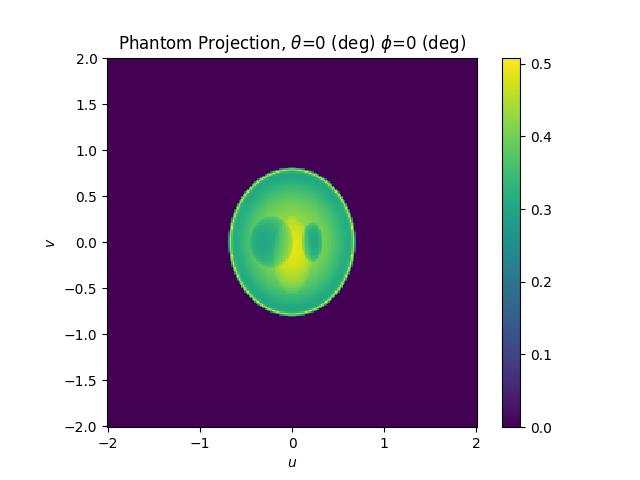

In [8]:
fig, ax = plt.subplots()
im = grid_uv.plot(ax, p_uv)
ax.set_xlabel(f'$u$')
ax.set_ylabel(f'$v$')
ax.set_title(f'Phantom Projection, $\\theta$={theta.deg} (deg) $\phi$={phi.deg} (deg)')
plt.colorbar(im, ax=ax);

In [9]:
A = ray_matrix(theta, phi, axes3, grid_uv)

100%|████████████████████████████████████████████████████████| 65536/65536 [03:16<00:00, 332.91it/s]


In [10]:
x3 = p3.raster(axes3)

In [12]:
y_uv = A @ x3.flat
y_uv.shape = grid_uv.shape

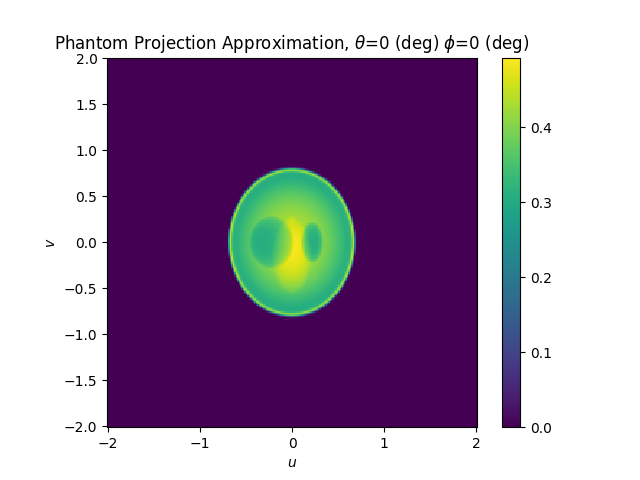

In [13]:
fig, ax = plt.subplots()
im = grid_uv.plot(ax, y_uv)
ax.set_xlabel(f'$u$')
ax.set_ylabel(f'$v$')
ax.set_title(f'Phantom Projection Approximation, $\\theta$={theta.deg} (deg) $\phi$={phi.deg} (deg)')
plt.colorbar(im, ax=ax);